# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

This is the mathematical equivalent of flipping a coin with a p= 0.15 chance of landing on heads 100 times, and modeling how many heads one can expect.  That is one can expect to get elixir 15 times.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

Since we are dealing with an inherently probabilistic process and all the trials are independent, technically one would have to buy infinitley many boxes in order to guarantee finding elixir.

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

Because there is a countable number of outcomes. 

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

The binomial distribuion is most appropriate for this question because we are counting successful outcomes out of a set number of trials.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [1]:
# Show your work; leave your answer in a comment.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline 

In [3]:
p_elixir = 0.15
n_boxes = 100

elixir_dist = stats.binom(n_boxes, p_elixir)

<BarContainer object of 101 artists>

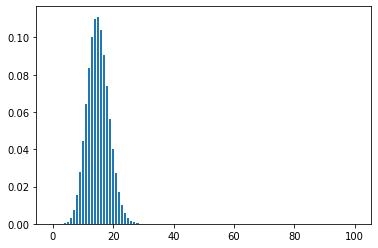

In [4]:
elixir_outcomes = list(range(0,101))

plt.bar(elixir_outcomes, elixir_dist.pmf(elixir_outcomes))

In [5]:
stats.binom.mean(100, .15, loc=0)

15.0

In [6]:
prob = 0
for i in range (20, 101):
    prob += elixir_dist.pmf(i)
print(prob)

0.10654425648029689


#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [7]:
1 - elixir_dist.cdf(20)
#probability of getting more than 20

0.06631976581888166

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

In [9]:
#You have a 6.63 percent chance of getting more than 20 elixirs.

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

In this instance the poisson distribution is best suited to the problem because we are making inferences about how many times an event occurs in a certain amount of time and we are talking about a relativley small number of events in a large batch of trials.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [10]:
# Show your work; leave your answer in a comment.
#lambda = 2.7
n_purchase = 2.7

box_dist = stats.poisson(n_purchase)

In [11]:
#each box is $1, so need probability of getting at least 500_000 buys
500000/2.7

185185.18518518517

In [ ]:
## Need at least 186,000 customers to make a revenue of $500,000 per month. 

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [12]:
#first find the probability that a user has bought more than 4 boxes, this will give fraction of high value users
(1-box_dist.cdf(4))* 186_000

25499.137541042575

In [13]:
186_000 - 25_500

160500

In [ ]:
#we made $25,500 from high-value users, and the remaining $160500 came from the much more numerous low-value users

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

Assuming we have hit our monthly revenue goal, we had 186,000 making purchases.  Of these customers, 160,500 purchased less than five boxes and a little more than 25,000 purchased more then 5-boxes.  Based on this ratio, our effort should be concentrated toward gaining a large quantity of casual buyers instead of a 
comparatively small amount of dedicated buyers.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [14]:
boxes = []
outcomes = [0, 1]
for i in range(100_000):
    count = 0    
    find = 0      #if zero no box found, if 1 box has been found
    while (find !=1):  #continue until we have found elixir
        count += 1     #count how many boxes have been opened  
        find = np.random.choice(outcomes, p = [.85, .15])  #0.85 chance of getting nothing, 0.15 chance of getting elixir
    boxes.append(count)   #add count to list
boxes[1:20]  
    

[3, 4, 2, 4, 4, 3, 11, 4, 2, 3, 12, 11, 5, 2, 6, 6, 5, 2, 4]

In [15]:
np.mean(boxes)

6.68604

On average, it takes 7 box purchases to find an elixir.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

Since this loop takes a long time to run, a Data frame seems most appropriate.  This would allow us to include the number of trials to find a particular item in it's own column being treated as an array.  Therefore a single data frame can encapsulate the data we need to answer this problem.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

Every trial represents a transaction that earns the same amount for the company regardless of what is found, we only need to count up the total count of trials. Whichever version has the larger total count is the version that makes more money.   